<br><font size="8">SchedTune on Salvator-X</font><br>

In [1]:
import logging
reload(logging)
logging.basicConfig(
    format='%(asctime)-9s %(levelname)-8s: %(message)s',
    datefmt='%I:%M:%S')

# Enable logging at INFO level
logging.getLogger().setLevel(logging.INFO)

In [2]:
# Generate plots inline
%pylab inline

import json
import os

# Support for performance analysis of RTApp workloads
from trace_analysis import TraceAnalysis

# Support for trace events analysis
from trace import Trace
from perf_analysis import PerfAnalysis

# Suport for FTrace events parsing and visualization
import trappy

Populating the interactive namespace from numpy and matplotlib


# Test setup

In [3]:
# Base folder where tests folder are located
res_dir = '/root/lisa/results/20160629_194000'
logging.info('Content of the output folder %s', res_dir)
!tree {res_dir}

11:26:35  INFO    : Content of the output folder /root/lisa/results/20160629_194000


/root/lisa/results/20160629_194000
├── rtapp:boost15:mixprof
│   ├── 1
│   │   ├── cluster_freqs.png
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_r5_10-60-0.log
│   │   ├── task_perf_task_r5_10-60.png
│   │   ├── task_util_task_r5_10-60.png
│   │   ├── trace.dat
│   │   ├── trace.raw.txt
│   │   └── trace.txt
│   ├── kernel.config
│   ├── kernel.version
│   └── platform.json
├── rtapp:boost30:mixprof
│   ├── 1
│   │   ├── cluster_freqs.png
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_r5_10-60-0.log
│   │   ├── task_perf_task_r5_10-60.png
│   │   ├── task_util_task_r5_10-60.png
│   │   ├── trace.dat
│   │   ├── trace.raw.txt
│   │   └── trace.txt
│   ├── kernel.config
│   ├── kernel.version
│   └── platform.json
├── rtapp:boost60:mixprof
│   ├── 1
│   │   ├── cluster_freqs.png
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_r5_10-60-0.log
│   │   ├── task_perf_task_r5_10-60.png
│   │   ├── task_util_t

In [4]:
with open(os.path.join(res_dir, 'rtapp:noboost:mixprof', 'platform.json'), 'r') as fh:
    platform = json.load(fh)
    print platform
#print json.dumps(platform, indent=4)
logging.info('LITTLE cluster max capacity: %d',
             platform['nrg_model']['little']['cpu']['cap_max'])

11:26:35  INFO    : LITTLE cluster max capacity: 252


{u'nrg_model': {u'big': {u'cluster': {u'nrg_max': 319}, u'cpu': {u'cap_max': 1024, u'nrg_max': 1885}}, u'little': {u'cluster': {u'nrg_max': 45}, u'cpu': {u'cap_max': 252, u'nrg_max': 549}}}, u'clusters': {u'big': [0, 1, 2, 3], u'little': [4, 5, 6, 7]}, u'cpus_count': 8, u'freqs': {u'big': [500000, 1000000, 1500000], u'little': [200000, 400000, 700000, 1000000, 1200000]}, u'topology': [[4, 5, 6, 7], [0, 1, 2, 3]]}


# Configuration

In [5]:
# Full analysis function
def analysis(test_id, t_min=None, t_max=None):
    
    test_dir = '{}/rtapp:{}:mixprof'.format(res_dir, test_id)
    run_dir = '{}/1/'.format(test_dir)
    platform_json = '{}/platform.json'.format(test_dir)
    trace_file = '{}/trace.dat'.format(run_dir)
    
    # Load platform description data
    with open(platform_json, 'r') as fh:
        platform = json.load(fh)

    # Load RTApp Performance data
    pa = PerfAnalysis(run_dir)
    logging.info("Loaded performance data for tasks: %s", pa.tasks())
    
    # Load Trace data
    events = [
        "sched_switch",
        "sched_contrib_scale_f",
        "sched_load_avg_cpu",
        "sched_load_avg_task",
        "sched_tune_tasks_update",
        "sched_boost_cpu",
        "sched_boost_task",
        "sched_energy_diff",
        "cpu_frequency",
        "cpu_capacity",
        "sched_overutilized", # Added
        "cpu_idle"            # Added
    ]
    trace = Trace(platform, run_dir, events, tasks=pa.tasks())
    ta = TraceAnalysis(trace, tasks=pa.tasks())
    
    # Define time ranges for all the temporal plots
    ta.setXTimeRange(t_min, t_max)
    
    # Tasks plots
    ta.plotTasks()
    for task in pa.tasks():
        pa.plotPerf(task)

    # Cluster and CPUs plots
    ta.plotClusterFrequencies()


<p><!-- pagebreak --></p><p style="page-break-after:always;"></p>

















# Results

## No Boosting

11:26:35  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
11:26:35  INFO    : Parsing FTrace format...
11:26:44  INFO    :   task    task_r5_10-60 found, pid: [2433]
11:26:44  INFO    : Collected events spans a 16.153 [s] time interval
11:26:44  INFO    : Overutilized time: 0.994134 [s] (6.155% of trace time)
11:26:44  INFO    : Set plots time range to (0.000000, 16.152942)[s]
11:26:44  INFO    : Set plots time range to (0.000000, 16.152942)[s]
11:26:44  INFO    :   task    task_r5_10-60 found, pid: [2433]
11:26:44  INFO    : 201 252 819 1024


Maximum estimated system energy: 10100


11:26:45  INFO    : PerfIndex, Task [task_r5_10-60] avg: 0.56, std: 0.16
11:26:46  INFO    : LITTLE cluster average frequency: 0.617 GHz
11:26:46  INFO    : big    cluster average frequency: 0.539 GHz


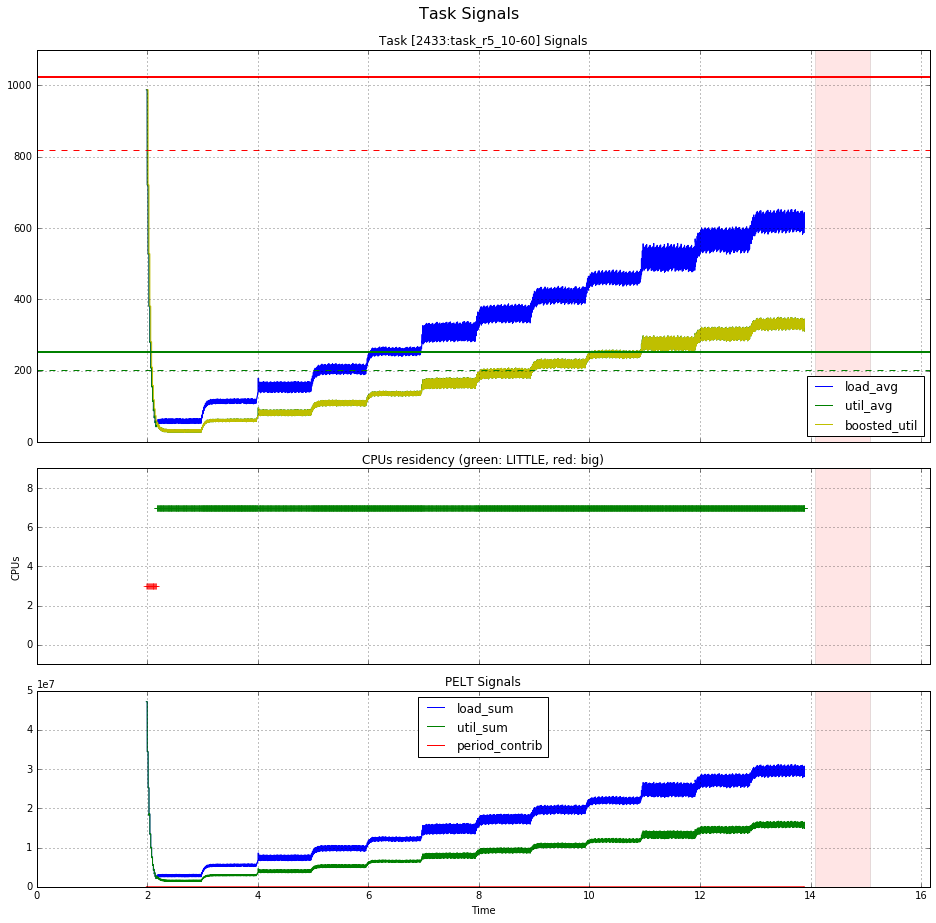

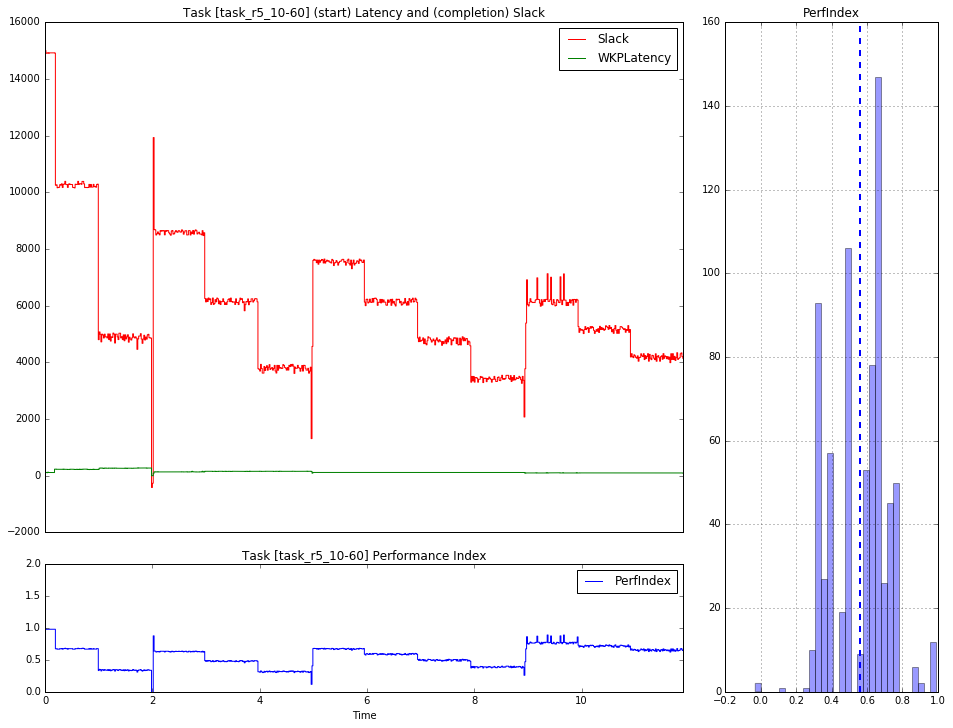

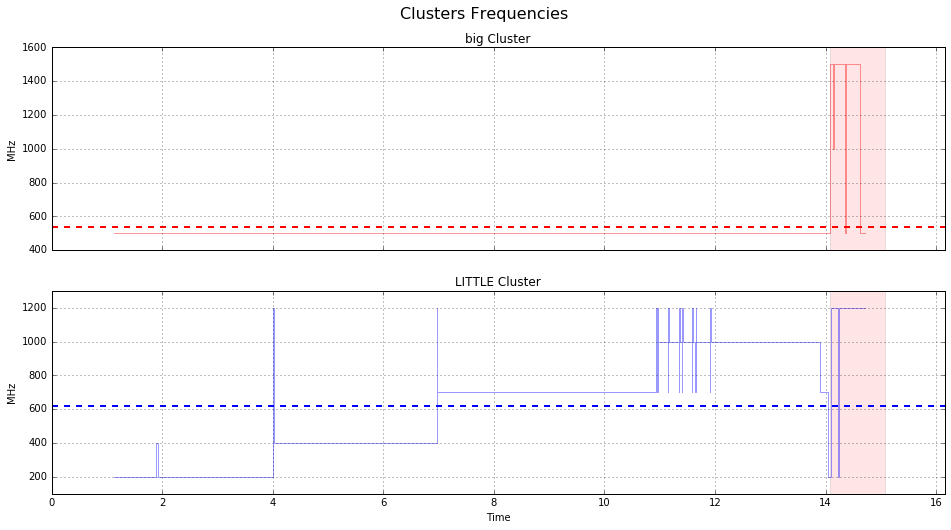

In [6]:
analysis('noboost')

## Boost 15%

11:26:47  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
11:26:47  INFO    : Parsing FTrace format...
11:26:56  INFO    :   task    task_r5_10-60 found, pid: [2506]
11:26:56  INFO    : Collected events spans a 16.074 [s] time interval
11:26:56  INFO    : Overutilized time: 0.030933 [s] (0.192% of trace time)
11:26:56  INFO    : Set plots time range to (0.000000, 16.074297)[s]
11:26:56  INFO    : Set plots time range to (0.000000, 16.074297)[s]
11:26:56  INFO    :   task    task_r5_10-60 found, pid: [2506]
11:26:56  INFO    : 201 252 819 1024


Maximum estimated system energy: 10100


11:26:57  INFO    : PerfIndex, Task [task_r5_10-60] avg: 0.97, std: 0.02
11:26:58  INFO    : LITTLE cluster average frequency: 1.200 GHz
11:26:58  INFO    : big    cluster average frequency: 0.539 GHz


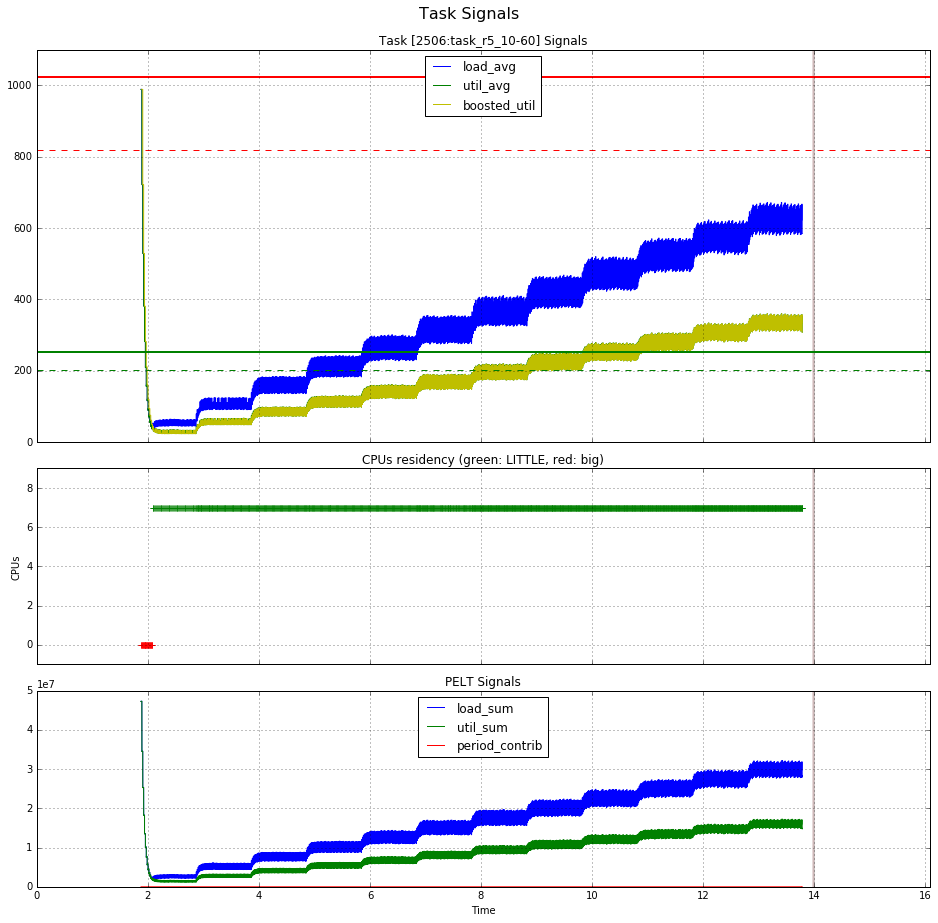

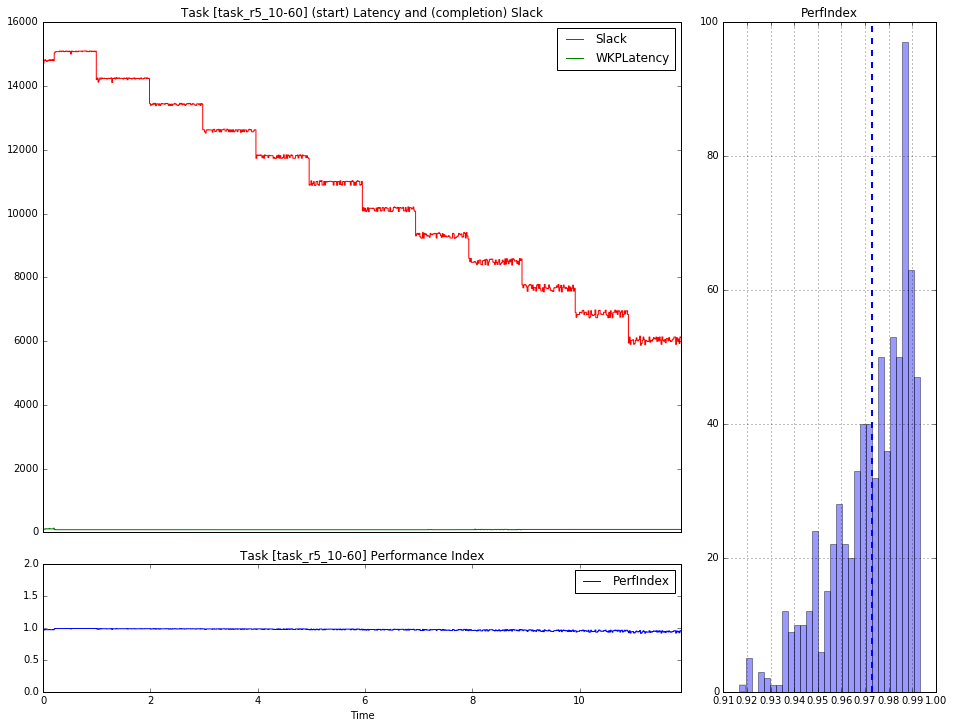

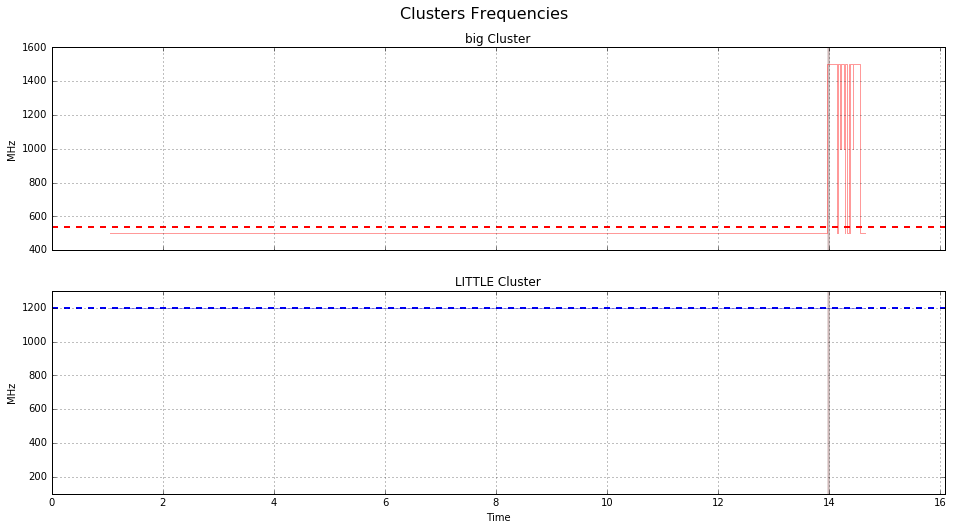

In [7]:
analysis('boost15')

## Boost 30%

11:26:59  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
11:26:59  INFO    : Parsing FTrace format...
11:27:06  INFO    :   task    task_r5_10-60 found, pid: [2581]
11:27:06  INFO    : Collected events spans a 16.104 [s] time interval
11:27:06  INFO    : Overutilized time: 1.533925 [s] (9.525% of trace time)
11:27:06  INFO    : Set plots time range to (0.000000, 16.103737)[s]
11:27:06  INFO    : Set plots time range to (0.000000, 16.103737)[s]
11:27:06  INFO    :   task    task_r5_10-60 found, pid: [2581]
11:27:06  INFO    : 201 252 819 1024


Maximum estimated system energy: 10100


11:27:08  INFO    : PerfIndex, Task [task_r5_10-60] avg: 0.97, std: 0.02
11:27:08  INFO    : LITTLE cluster average frequency: 1.200 GHz
11:27:08  INFO    : big    cluster average frequency: 0.535 GHz


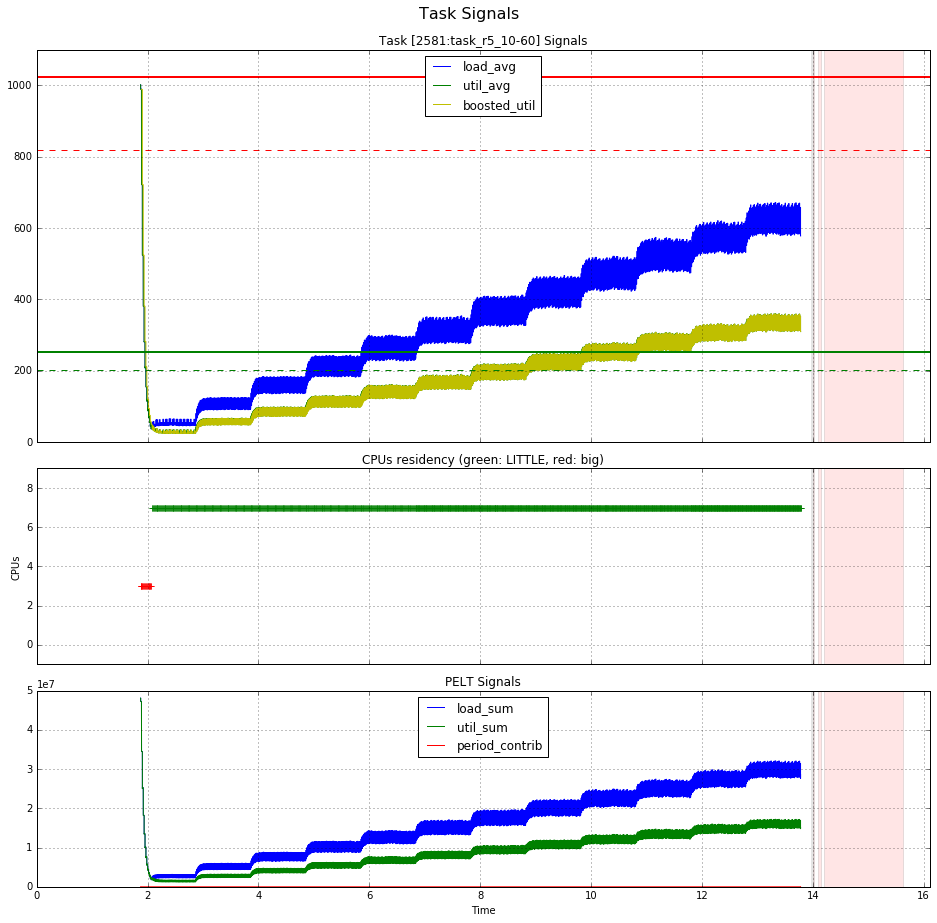

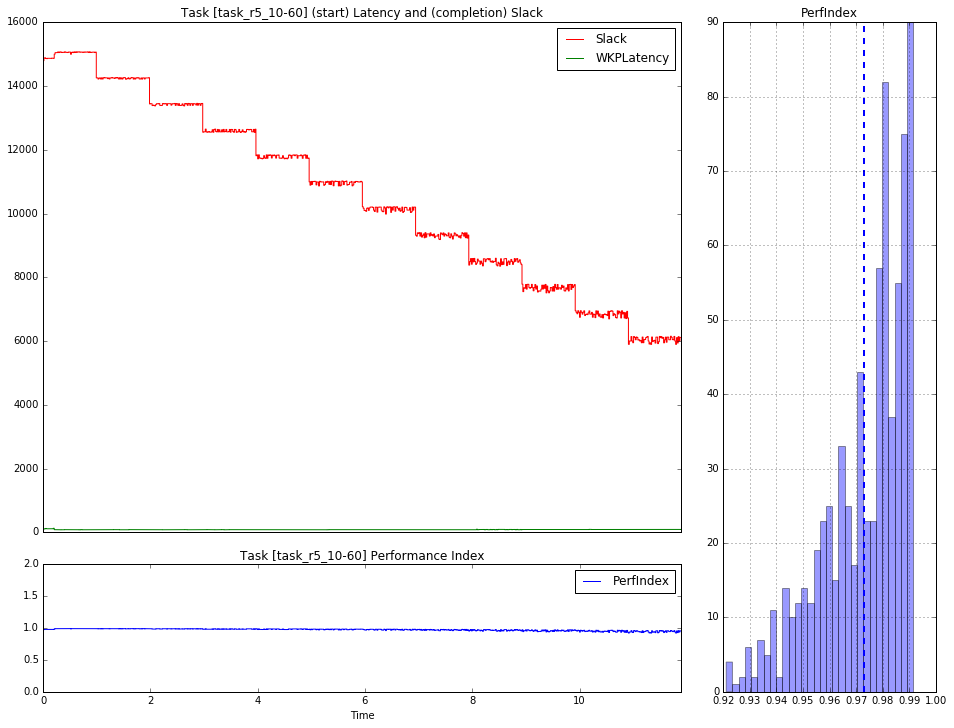

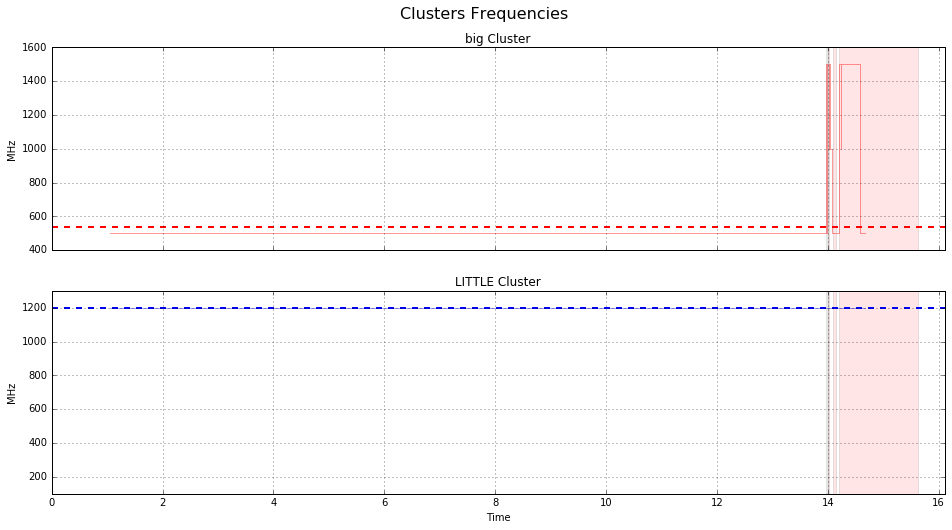

In [8]:
analysis('boost30')

## Boost 60%

11:27:09  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
11:27:09  INFO    : Parsing FTrace format...
11:27:17  INFO    :   task    task_r5_10-60 found, pid: [2654]
11:27:17  INFO    : Collected events spans a 16.111 [s] time interval
11:27:17  INFO    : Overutilized time: 0.191063 [s] (1.186% of trace time)
11:27:17  INFO    : Set plots time range to (0.000000, 16.111436)[s]
11:27:17  INFO    : Set plots time range to (0.000000, 16.111436)[s]
11:27:17  INFO    :   task    task_r5_10-60 found, pid: [2654]
11:27:17  INFO    : 201 252 819 1024


Maximum estimated system energy: 10100


11:27:18  INFO    : PerfIndex, Task [task_r5_10-60] avg: 0.97, std: 0.02
11:27:19  INFO    : LITTLE cluster average frequency: 1.190 GHz
11:27:19  INFO    : big    cluster average frequency: 0.538 GHz


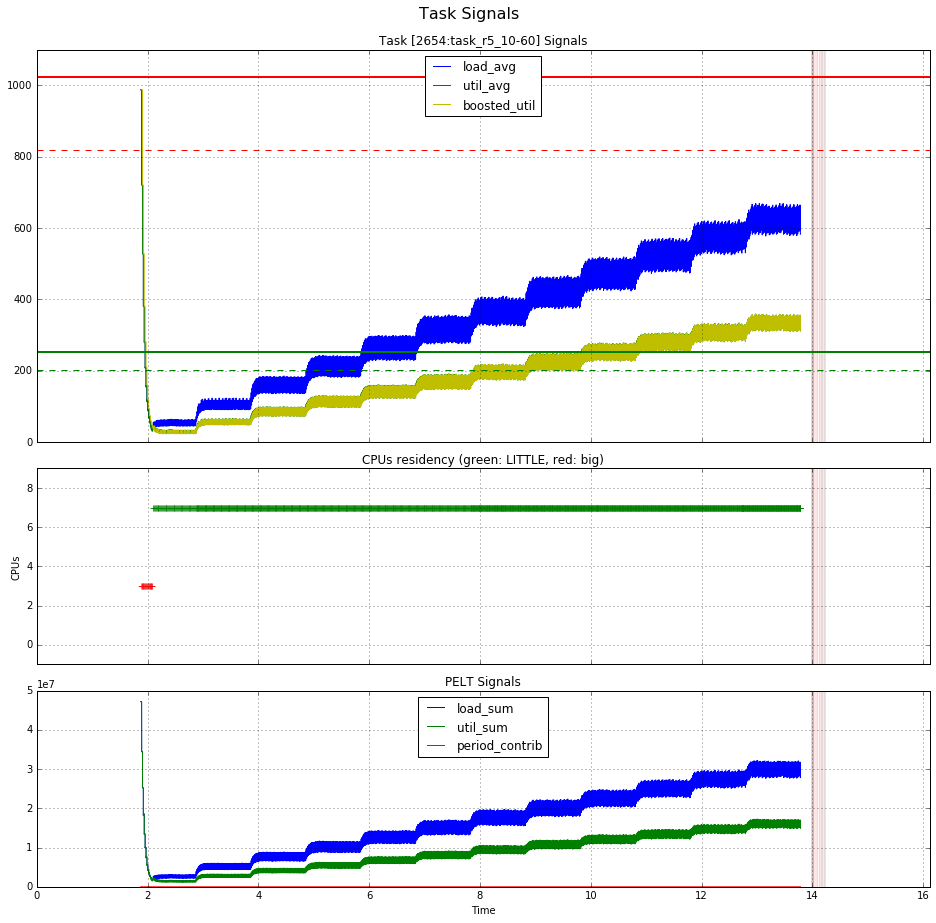

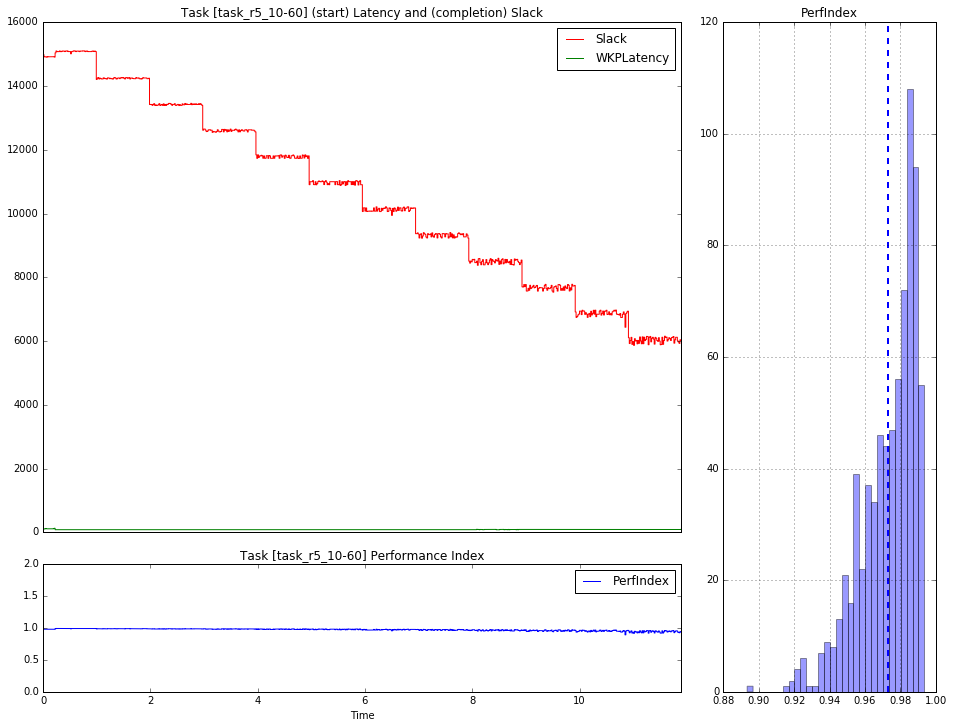

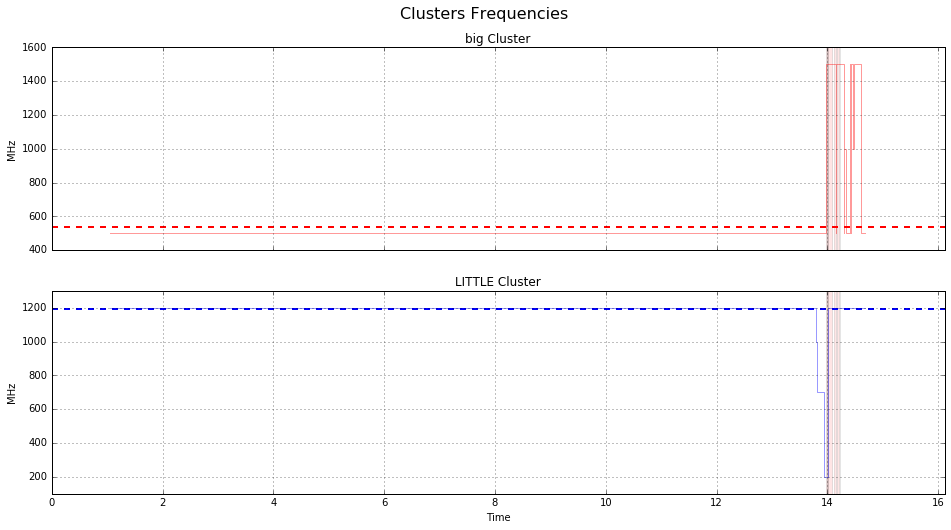

In [9]:
analysis('boost60')